<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Manipulación de Datos y Análisis Descriptivos en `Python` con [Pandas](https://pandas.pydata.org/)

Este *cuaderno*  tiene como objetivo proporcionar una revisión breve y concisa de las funciones más útiles de la librería [pandas](https://pandas.pydata.org/) para ayudar a los estudiantes  en las actividades del curso.

El *cuaderno* inicia revisando funciones de [pandas](https://pandas.pydata.org/) centrándose principalmente en el uso de  `DataFrames` que servirá para el análisis de datos en el curso. El tutorial finaliza, mostrando un análisis descriptivo básico, señalando su importancia y como se puede utilizar [pandas](https://pandas.pydata.org/) junto a las librerías [matplotlib](https://matplotlib.org/) y [seaborn](https://seaborn.pydata.org/)  para entender la distribución de los datos, su correlación y dispersión. 

**NO** es necesario editar el archivo o hacer una entrega. Los ejemplos contienen celdas con código ejecutable (`en gris`), que podrá modificar  libremente. Esta puede ser una buena forma de aprender nuevas funcionalidades del *cuaderno*, o experimentar variaciones en los códigos de ejemplo.


## La librería [Pandas](https://pandas.pydata.org/) y su instalación

[Pandas](https://pandas.pydata.org/) es una librería de `Python`  y  una herramienta esencial en el kit de herramientas de cualquier científico de datos o analista, ya que nos permite trabajar de manera eficiente con datos estructurados y realizar tareas como la manipulación, limpieza, agregación y visualización de datos.


[Pandas](https://pandas.pydata.org/)  se basa en la librería [Numpy](http://www.numpy.org/) y su estructura de datos clave es llamada `DataFrame`. Los `DataFrames` te permiten almacenar y manipular datos tabulados en filas de observaciones y columnas de variables.

Hay varias razones por las que [pandas](https://pandas.pydata.org/) es una herramienta tan popular en el análisis de datos:

- Permite el manejo de datos de una forma eficiente y flexible.
- Ofrece estructuras de datos para manejar datos numéricos, de tiempo y datos de texto.
- Tiene herramientas para leer y escribir datos en muchos formatos.
- Está integrado con otras bibliotecas de `Python` como [matplotlib](https://matplotlib.org/) y [seaborn](https://seaborn.pydata.org/) , que exploraremos brevemente al final de ese *cuaderno*.

### Instalación de [Pandas](https://pandas.pydata.org/)

Si aún no tienes instalado [Pandas](https://pandas.pydata.org/), podemos hacerlo usando `pip`:

```
pip install pandas
```

Si estamos usando un notebook de Jupyter, asegúrate de poner un signo de exclamación antes del comando pip para que se ejecute en el shell del sistema:

```
!pip install pandas
```
.


### Verificar la instalación

Podemos verificar que [pandas](https://pandas.pydata.org/) esté instalado correctamente intentando importarlo. Si podemos importar [pandas](https://pandas.pydata.org/) sin que se muestre ningún error, entonces está instalado correctamente:



In [1]:
import pandas as pd

Si [pandas](https://pandas.pydata.org/) está instalado correctamente, este comando no debería dar ningún error. Puedes también verificar usando `!pip show pandas`. Si la librería está instalada debería retornar un mensaje similar al que se ve a continuación. 

In [2]:
!pip show pandas

Name: pandas
Version: 1.3.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /opt/conda/lib/python3.7/site-packages
Requires: numpy, python-dateutil, pytz
Required-by: datazets, formulaic, geopandas, ISLP, lifelines, pca, pyLDAvis, seaborn, statsmodels, vincent, xarray


## Estructuras de datos en [Pandas](https://pandas.pydata.org/)

[Pandas](https://pandas.pydata.org/) contiene tres objetos para estructurar sus datos: `Series`, `DataFrame` e `Index`. Los `DataFrames` serán especialmente importantes en el desarrollo del curso y en este *cuaderno* nos centraremos en ellos, sin embargo hacemos una breve revisión sobre los objetos `Series` e `Index` previamente.


### Series

Una Serie es una estructura de datos unidimensional etiquetada en [Pandas](https://pandas.pydata.org/). Puede contener cualquier tipo de dato y es similar a una columna en una hoja de cálculo o un diccionario. Cada elemento en una `Serie` está asociado con una etiqueta única llamada índice. La Serie proporciona capacidades de indexación y manipulación de datos poderosas.

Se puede crear a partir de una lista o array de la siguiente manera:

In [3]:

# Ejemplo de creación de una Serie
import pandas as pd
s = pd.Series([1, 3, 5, None, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Una `Serie` de [Pandas](https://pandas.pydata.org/) se comporta de muchas maneras como un array de NumPy y en otras como un diccionario estándar de Python. Si tenemos una Serie `s`, podemos seleccionar datos usando la indexación de array (usando un índice explícito) y la indexación de diccionario (usando el índice asignado).


In [4]:
s = pd.Series([1, 3, 5, None, 6, 8], index=['a', 'b', 'c', 'd', 'e', 'f'])
print(s['b'])  # indexación de diccionario
print(s[1])  # indexación de array

3.0
3.0



### Index

En la sección anterior vimos que las `Series` contienen un índice explícito que permite hacer referencia y modificar los datos, esto será también cierto para los `DataFrames`. Este índice es una estructura similar a un array inmutable en `Pandas` que contiene las etiquetas de las filas o columnas en una `Serie` o `DataFrame`. Proporciona así, una forma de identificar de manera única cada fila o columna y permite una recuperación eficiente y alineación de datos. El Índice puede contener etiquetas de cualquier tipo de dato que sea hashable, como enteros, caracteres o fechas.

In [5]:
# Ejemplo de creación de un objeto Index

index = pd.Index([0,1,"hola"])
obj2 = pd.Series([1.5, -2.5, 0], index=index)
obj2.index

Index([0, 1, 'hola'], dtype='object')

Los objetos Index son inmutables y no pueden ser modificados por el usuario. La inmutabilidad hace que sea más seguro compartir los objetos Index entre múltiples `DataFrames` y `arrays`, sin el riesgo de que el índice sea modificado.

## DataFrames


Un `DataFrame` es una estructura de datos bidimensional etiquetada en [pandas](https://pandas.pydata.org/). Se puede pensar en `DataFrames` como una hoja de cálculo o una tabla SQL. Un `DataFrame` consta de filas y columnas, donde cada columna puede contener un tipo de dato diferente y proporciona una forma conveniente de almacenar y manipular este tipo de datos.

Es el objeto más comúnmente usado en [pandas](https://pandas.pydata.org/). Se puede por ejemplo crear a partir de un diccionario de objetos. Para ilustrar como generar y operar sobre estos, partamos de 4 listas:


In [6]:
nombres = ['Lucas', 'Juliana', 'Juan', 'Carla']
sexo = ['M', 'F', 'M', None]
edad = [23, 21, 25, 30]
notas = [4.5, 2, 3.25, 4]

Luego creamos un diccionario:

In [7]:
diccionario = {'names': nombres, 'sex': sexo, 'age': edad, 'grades': notas}
diccionario

{'names': ['Lucas', 'Juliana', 'Juan', 'Carla'],
 'sex': ['M', 'F', 'M', None],
 'age': [23, 21, 25, 30],
 'grades': [4.5, 2, 3.25, 4]}

Finalmente un dataframe con la función DataFrame:

In [8]:
data = pd.DataFrame(diccionario)
data

,names,sex,age,grades
0,Lucas,M,23,4.50
1,Juliana,F,21,2.00
2,Juan,M,25,3.25
3,Carla,None,30,4.00


Sin embargo muy a menudo utilizaremos esta estructura para cargar datos externos. Por ejemplo, los *cuadernos* de la primer semana utilizaran los datos de la  [Encuesta Nacional de Presupuestos de los Hogares (ENPH) de Colombia](https://www.dane.gov.co/index.php/estadisticas-por-tema/pobreza-y-condiciones-de-vida/encuesta-nacional-de-presupuestos-de-los-hogares-enph), que están en formato `csv`. 

La ENPH tiene como objetivo principal obtener información sobre las fuentes de los ingresos y la distribución de los gastos de los hogares colombianos a nivel nacional. Por medio de estos datos se crean las ponderaciones de las canastas para actualizar el Índice de Precios al Consumidor (IPC), se construyen las cuentas de los hogares en el Sistema de Cuentas Nacionales y se estiman las líneas de pobreza y pobreza extrema del país. Con estas cifras es posible informar y construir herramientas para la toma de decisiones de política pública nacional.

Los datos que utilizaremos aquí corresponden a la encuesta realizada por el DANE en todo el territorio colombiano, entre julio de 2016 y julio de 2017, en 87.201 hogares ubicados en 32 ciudades capitales de departamento y 6 ciudades intermedias. 

### Cargando datos en un `DataFrame`

[Pandas](https://pandas.pydata.org/) proporciona la función `read_csv()` para leer archivos `csv` y `read_excel()` apara leer archivos `xlsx` y convertirlos en un `DataFrame`. Esta función es increíblemente flexible y puede manejar una amplia variedad de formatos de archivos CSV.

Para cargar los datos de la ENPH, disponibles en la carpeta data debemos hacer:

In [9]:
# Ejemplo de carga de datos CSV en un DataFrame
df = pd.read_csv('data/gasto_col_2017.csv')
df.head()

,Ciudad,Alimentos y bebidas no alcohólicas,Bebidas alcohólicas y tabaco,Prendas de vestir y calzado,"Alojamiento, agua, electricidad, gas y otros combustibles","Muebles, artículos para el hogar y para la conservación ordinaria del hogar",Salud,Transporte,Información y comunicación,Recreación y cultura,Educación,Restaurantes y hoteles,Bienes y servicios diversos
0,Arauca,76.532496,11.983778,21.065229,158.952746,15.040745,11.793285,20.656260,20.404561,11.523317,24.240347,44.130546,55.110519
1,Armenia,104.227192,18.610392,39.651621,174.252141,26.524739,14.846364,71.426343,30.486730,28.148628,58.902919,62.735795,145.317221
2,Barrancabermeja,73.495641,23.511551,25.204020,218.377925,16.637673,8.367648,51.842837,25.653363,12.853022,68.650880,42.090619,58.657609
3,Barranquilla,85.059421,16.028608,23.798484,204.792777,20.162867,7.785154,61.043240,24.506067,12.261522,58.348581,54.051667,72.252969
4,Bogotá,103.561150,21.839434,42.814236,295.817640,34.168082,27.459289,111.870806,40.657457,36.484350,134.933249,94.643529,236.887545


En este ejemplo, estamos cargando el archivo `gasto_col_2017.csv` que se encuentra en la carpeta `data`. La función `read_csv()` lee el archivo y lo convierte en un `DataFrame`. Luego, usamos el método `head()` para imprimir las primeras 5 filas del `DataFrame`. Si los datos hubiesen estado en formato excel (`xlsx`), hubiésemos utilizado `read_excel()`.

El `DataFrame` contiene datos de gasto promedio por persona, en miles de pesos, que surgen de la [Encuesta Nacional de Presupuestos de los Hogares (ENPH) de Colombia](https://www.dane.gov.co/index.php/estadisticas-por-tema/pobreza-y-condiciones-de-vida/encuesta-nacional-de-presupuestos-de-los-hogares-enph). Estos corresponden a los gastos promedios de las personas que viven en 38 ciudades, 32 ciudades capitales de departamento y 6 ciudades intermedias, y para 12 grandes divisiones de gastos. Por ejemplo en Arauca, el gasto promedio mensual por individuo fue de  76.5 mil de pesos por mes en Alimentos y bebidas no alcohólicas, mientras que en Armenia fue de 104.2 mil pesos.

### Atributos de un `DataFrame`

Los `DataFrames` de [pandas](https://pandas.pydata.org/) tienen varios atributos que proporcionan información sobre los datos. Aquí hay una descripción de algunos de ellos:

- `info()`: Este método proporciona un resumen conciso del `DataFrame`, incluyendo el número de entradas no nulas en cada columna, el tipo de datos, la memoria utilizada, etc.
- `index`: Este atributo proporciona el índice (etiquetas de las filas) del DataFrame.
- `columns`: Este atributo proporciona las columnas del DataFrame (etiquetas de las columnas).
- `shape`: Este atributo proporciona una tupla que representa la dimensionalidad del DataFrame (número de filas, número de columnas).
- `size`: Este atributo proporciona el número total de elementos en el DataFrame.
- `count()`: Este método devuelve el número de entradas no nulas para cada columna.
- `values`: Este atributo proporciona los datos del DataFrame como una matriz Numpy.
- `T`: Este atributo proporciona la transpuesta del DataFrame (intercambia filas y columnas).
- `dtypes`: Este atributo proporciona los tipos de datos de las columnas.

A continuación, veremos ejemplos de algunos de estos atributos utilizando el `DataFrame` que cargamos en el paso anterior.

In [10]:
# Ejemplo del método info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 13 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Ciudad                                                                       38 non-null     object 
 1   Alimentos y bebidas no alcohólicas                                           38 non-null     float64
 2   Bebidas alcohólicas y tabaco                                                 38 non-null     float64
 3   Prendas de vestir y calzado                                                  38 non-null     float64
 4   Alojamiento, agua, electricidad, gas y otros combustibles                    38 non-null     float64
 5   Muebles, artículos para el hogar y para la conservación ordinaria del hogar  38 non-null     float64
 6   Salud                                       

Tenemos entonces información básica sobre los datos. Por ejemplo, podemos ver que hay 13 columnas, donde la primer columna es la ciudad y las restantes son los gastos por categorías.

In [11]:
# Ejemplo del atributo shape
df.shape

(38, 13)

In [12]:
# Ejemplo del método count()
df.count()

Ciudad                                                                         38
Alimentos y bebidas no alcohólicas                                             38
Bebidas alcohólicas y tabaco                                                   38
Prendas de vestir y calzado                                                    38
Alojamiento, agua, electricidad, gas y otros combustibles                      38
Muebles, artículos para el hogar y para la conservación ordinaria del hogar    38
Salud                                                                          38
Transporte                                                                     38
Información y comunicación                                                     38
Recreación y cultura                                                           38
Educación                                                                      38
Restaurantes y hoteles                                                         38
Bienes y servici

`Shape` entonces nos dió las dimensiones de la matriz de datos y `count`, la cantidad de datos no nulos. Podemos ver que no hay datos faltantes en este conjunto de datos.

### Manipulando datos

`Pandas` proporciona una variedad de herramientas poderosas para manipular datos. 


#### Filtrado de filas y columnas

El filtrado de datos es una de las operaciones más comunes que se realizan en los conjuntos de datos. [Pandas](https://pandas.pydata.org/) proporciona varias formas de filtrar filas y columnas. 

Veamos algunos ejemplos:

In [13]:
# Filtrado de columnas
# Para filtrar columnas, podemos simplemente seleccionar las columnas que queremos mantener.
# Por ejemplo, si queremos mantener solo las columnas 'Ciudad' y 'Alimentos y bebidas no alcohólicas', podemos hacer lo siguiente:
filtered_df = df[['Ciudad', 'Alimentos y bebidas no alcohólicas']]
filtered_df.head()

,Ciudad,Alimentos y bebidas no alcohólicas
0,Arauca,76.532496
1,Armenia,104.227192
2,Barrancabermeja,73.495641
3,Barranquilla,85.059421
4,Bogotá,103.561150


In [14]:
# Filtrado de filas
# Para filtrar filas, podemos usar una condición booleana.
# Por ejemplo, si queremos mantener solo las filas donde 'Alimentos y bebidas no alcohólicas' es mayor que 100, podemos hacer lo siguiente:
filtered_df = df[df['Alimentos y bebidas no alcohólicas'] > 100]
filtered_df.head()

,Ciudad,Alimentos y bebidas no alcohólicas,Bebidas alcohólicas y tabaco,Prendas de vestir y calzado,"Alojamiento, agua, electricidad, gas y otros combustibles","Muebles, artículos para el hogar y para la conservación ordinaria del hogar",Salud,Transporte,Información y comunicación,Recreación y cultura,Educación,Restaurantes y hoteles,Bienes y servicios diversos
1,Armenia,104.227192,18.610392,39.651621,174.252141,26.524739,14.846364,71.426343,30.486730,28.148628,58.902919,62.735795,145.317221
4,Bogotá,103.561150,21.839434,42.814236,295.817640,34.168082,27.459289,111.870806,40.657457,36.484350,134.933249,94.643529,236.887545
5,Bucaramanga y A.M.,116.112467,19.981523,30.144928,256.090343,27.260033,16.972276,78.576804,31.049534,22.856329,64.610028,89.829779,118.633960
14,Manizales y A.M.,102.900882,23.313631,42.795811,210.238451,28.010105,17.577596,92.665974,34.479540,28.104529,63.279904,57.231951,149.118900
32,Tumaco,105.469327,20.187634,27.023933,88.762860,14.164945,9.827021,24.756932,10.489231,9.262139,29.318640,35.233539,62.302952


#### Selección de datos con loc e iloc

`Pandas` proporciona los métodos `loc` e `iloc` para seleccionar datos de un DataFrame.

    -  `loc` se basa en las etiquetas, lo que significa que puedes especificar el nombre de las filas y columnas que quieres seleccionar. Esto puede incluir rangos de nombres de columnas.
    - `iloc` se basa en la posición de los datos en el `DataFrame`. Esto significa que debemos especificar las filas y columnas por su número de índice.

Veamos  algunos ejemplos de cómo usar `loc` e `iloc`.

In [15]:
# Ejemplo de uso de loc para seleccionar todas las filas y algunas columnas por nombre
df.loc[:, ['Ciudad', 'Alimentos y bebidas no alcohólicas', 'Salud']].head()

,Ciudad,Alimentos y bebidas no alcohólicas,Salud
0,Arauca,76.532496,11.793285
1,Armenia,104.227192,14.846364
2,Barrancabermeja,73.495641,8.367648
3,Barranquilla,85.059421,7.785154
4,Bogotá,103.561150,27.459289


In [16]:
# Ejemplo de uso de iloc para seleccionar las primeras 5 filas y las primeras 3 columnas por índice
df.iloc[:5, :3]

,Ciudad,Alimentos y bebidas no alcohólicas,Bebidas alcohólicas y tabaco
0,Arauca,76.532496,11.983778
1,Armenia,104.227192,18.610392
2,Barrancabermeja,73.495641,23.511551
3,Barranquilla,85.059421,16.028608
4,Bogotá,103.561150,21.839434


### Modificando el `DataFrame`

[Pandas](https://pandas.pydata.org/) también proporciona una variedad de métodos para modificar `DataFrames`. Esto incluye agregar nuevas columnas, eliminar columnas, fijar y cambiar el índice. Vamos a ver algunos ejemplos de cómo hacer esto.

#### Agregar una nueva columna

Podemos agregar una nueva columna a un `DataFrame` simplemente asignando datos a una nueva columna. Por ejemplo, si queremos agregar una nueva columna llamada `Total` que es la suma de `Alimentos y bebidas no alcohólicas`.

In [17]:

df['Total'] = df['Alimentos y bebidas no alcohólicas'] + df['Salud']
df.head()

,Ciudad,Alimentos y bebidas no alcohólicas,Bebidas alcohólicas y tabaco,Prendas de vestir y calzado,"Alojamiento, agua, electricidad, gas y otros combustibles","Muebles, artículos para el hogar y para la conservación ordinaria del hogar",Salud,Transporte,Información y comunicación,Recreación y cultura,Educación,Restaurantes y hoteles,Bienes y servicios diversos,Total
0,Arauca,76.532496,11.983778,21.065229,158.952746,15.040745,11.793285,20.656260,20.404561,11.523317,24.240347,44.130546,55.110519,88.325781
1,Armenia,104.227192,18.610392,39.651621,174.252141,26.524739,14.846364,71.426343,30.486730,28.148628,58.902919,62.735795,145.317221,119.073555
2,Barrancabermeja,73.495641,23.511551,25.204020,218.377925,16.637673,8.367648,51.842837,25.653363,12.853022,68.650880,42.090619,58.657609,81.863289
3,Barranquilla,85.059421,16.028608,23.798484,204.792777,20.162867,7.785154,61.043240,24.506067,12.261522,58.348581,54.051667,72.252969,92.844574
4,Bogotá,103.561150,21.839434,42.814236,295.817640,34.168082,27.459289,111.870806,40.657457,36.484350,134.933249,94.643529,236.887545,131.020439


#### Eliminar una columna

Podemos eliminar una columna de un `DataFrame` usando el método `drop` con el parámetro `axis=1`. Por ejemplo, si queremos eliminar la columna `Total` que acabamos de agregar, podemos hacer lo siguiente:

In [18]:

df = df.drop('Total', axis=1)
df.head()

,Ciudad,Alimentos y bebidas no alcohólicas,Bebidas alcohólicas y tabaco,Prendas de vestir y calzado,"Alojamiento, agua, electricidad, gas y otros combustibles","Muebles, artículos para el hogar y para la conservación ordinaria del hogar",Salud,Transporte,Información y comunicación,Recreación y cultura,Educación,Restaurantes y hoteles,Bienes y servicios diversos
0,Arauca,76.532496,11.983778,21.065229,158.952746,15.040745,11.793285,20.656260,20.404561,11.523317,24.240347,44.130546,55.110519
1,Armenia,104.227192,18.610392,39.651621,174.252141,26.524739,14.846364,71.426343,30.486730,28.148628,58.902919,62.735795,145.317221
2,Barrancabermeja,73.495641,23.511551,25.204020,218.377925,16.637673,8.367648,51.842837,25.653363,12.853022,68.650880,42.090619,58.657609
3,Barranquilla,85.059421,16.028608,23.798484,204.792777,20.162867,7.785154,61.043240,24.506067,12.261522,58.348581,54.051667,72.252969
4,Bogotá,103.561150,21.839434,42.814236,295.817640,34.168082,27.459289,111.870806,40.657457,36.484350,134.933249,94.643529,236.887545


#### Fijar el índice

Podemos cambiar el índice de un `DataFrame` usando el método `set_index`. Por ejemplo, si queremos fijar el índice al nombre de la ciudad, podemos hacer lo siguiente:

In [19]:
df = df.set_index('Ciudad')
df.head()

,Alimentos y bebidas no alcohólicas,Bebidas alcohólicas y tabaco,Prendas de vestir y calzado,"Alojamiento, agua, electricidad, gas y otros combustibles","Muebles, artículos para el hogar y para la conservación ordinaria del hogar",Salud,Transporte,Información y comunicación,Recreación y cultura,Educación,Restaurantes y hoteles,Bienes y servicios diversos
Ciudad,,,,,,,,,,,,
Arauca,76.532496,11.983778,21.065229,158.952746,15.040745,11.793285,20.656260,20.404561,11.523317,24.240347,44.130546,55.110519
Armenia,104.227192,18.610392,39.651621,174.252141,26.524739,14.846364,71.426343,30.486730,28.148628,58.902919,62.735795,145.317221
Barrancabermeja,73.495641,23.511551,25.204020,218.377925,16.637673,8.367648,51.842837,25.653363,12.853022,68.650880,42.090619,58.657609
Barranquilla,85.059421,16.028608,23.798484,204.792777,20.162867,7.785154,61.043240,24.506067,12.261522,58.348581,54.051667,72.252969
Bogotá,103.561150,21.839434,42.814236,295.817640,34.168082,27.459289,111.870806,40.657457,36.484350,134.933249,94.643529,236.887545


##### Cambiar el índice

Si queremos cambiar el índice de nuevo a un rango numérico, podemos usar el método `reset_index`. Por ejemplo, si queremos cambiar el índice de nuevo a un rango numérico, podemos hacer lo siguiente:

In [20]:
df = df.reset_index()
df.head()

,Ciudad,Alimentos y bebidas no alcohólicas,Bebidas alcohólicas y tabaco,Prendas de vestir y calzado,"Alojamiento, agua, electricidad, gas y otros combustibles","Muebles, artículos para el hogar y para la conservación ordinaria del hogar",Salud,Transporte,Información y comunicación,Recreación y cultura,Educación,Restaurantes y hoteles,Bienes y servicios diversos
0,Arauca,76.532496,11.983778,21.065229,158.952746,15.040745,11.793285,20.656260,20.404561,11.523317,24.240347,44.130546,55.110519
1,Armenia,104.227192,18.610392,39.651621,174.252141,26.524739,14.846364,71.426343,30.486730,28.148628,58.902919,62.735795,145.317221
2,Barrancabermeja,73.495641,23.511551,25.204020,218.377925,16.637673,8.367648,51.842837,25.653363,12.853022,68.650880,42.090619,58.657609
3,Barranquilla,85.059421,16.028608,23.798484,204.792777,20.162867,7.785154,61.043240,24.506067,12.261522,58.348581,54.051667,72.252969
4,Bogotá,103.561150,21.839434,42.814236,295.817640,34.168082,27.459289,111.870806,40.657457,36.484350,134.933249,94.643529,236.887545


### Combinando  `DataFrames`

[Pandas](https://pandas.pydata.org/) proporciona varias formas de combinar `DataFrames`, incluyendo `merge` y `join`. 

- `merge` se utiliza para combinar dos `DataFrames` a lo largo de una columna en común.
- `join` se utiliza para combinar dos `DataFrames` a lo largo de su índice.


Vamos a ver algunos ejemplos de cómo usar `merge` y `join`. Para ello, primero dividamos la ENPH en dos:
    
- `df1` que contiene las columnas: `Ciudad`, `Alimentos y bebidas no alcohólicas`, `Bebidas alcohólicas y tabaco`, `Prendas de vestir y calzado`, A`lojamiento, agua, electricidad, gas y otros combustibles`, `Muebles, artículos para el hogar y para la conservación ordinaria del hogar` 
- `df2` que contiene `Ciudad`, `Salud`, `Transporte`, `Información y comunicación`, `Recreación y cultura`, `Educación`, `Restaurantes y hoteles`, `Bienes y servicios diversos`.


In [21]:
# Dividimos los datos en dos DataFrames
df1 = df[['Ciudad', 'Alimentos y bebidas no alcohólicas', 'Bebidas alcohólicas y tabaco', 'Prendas de vestir y calzado', 'Alojamiento, agua, electricidad, gas y otros combustibles', 'Muebles, artículos para el hogar y para la conservación ordinaria del hogar']]
df2 = df[['Ciudad', 'Salud', 'Transporte', 'Información y comunicación', 'Recreación y cultura', 'Educación', 'Restaurantes y hoteles', 'Bienes y servicios diversos']]

#### Merge de DataFrames

La función `merge()` se utiliza para combinar dos (o más) `DataFrames` en base a una columna común (clave).

In [22]:
# Merge df1 y df2 on 'Ciudad'
merge_df = pd.merge(df1, df2, on='Ciudad')

# Las primeras filas del nuevo DataFrame
merge_df.head()

,Ciudad,Alimentos y bebidas no alcohólicas,Bebidas alcohólicas y tabaco,Prendas de vestir y calzado,"Alojamiento, agua, electricidad, gas y otros combustibles","Muebles, artículos para el hogar y para la conservación ordinaria del hogar",Salud,Transporte,Información y comunicación,Recreación y cultura,Educación,Restaurantes y hoteles,Bienes y servicios diversos
0,Arauca,76.532496,11.983778,21.065229,158.952746,15.040745,11.793285,20.656260,20.404561,11.523317,24.240347,44.130546,55.110519
1,Armenia,104.227192,18.610392,39.651621,174.252141,26.524739,14.846364,71.426343,30.486730,28.148628,58.902919,62.735795,145.317221
2,Barrancabermeja,73.495641,23.511551,25.204020,218.377925,16.637673,8.367648,51.842837,25.653363,12.853022,68.650880,42.090619,58.657609
3,Barranquilla,85.059421,16.028608,23.798484,204.792777,20.162867,7.785154,61.043240,24.506067,12.261522,58.348581,54.051667,72.252969
4,Bogotá,103.561150,21.839434,42.814236,295.817640,34.168082,27.459289,111.870806,40.657457,36.484350,134.933249,94.643529,236.887545


#### Join de DataFrames

La función `join()` se utiliza para combinar columnas de dos `DataFrames` potencialmente diferentes en un solo `DataFrame`.

In [23]:
# Fijamos 'Ciudad' como el indice de ambos DataFrames
df1.set_index('Ciudad', inplace=True)
df2.set_index('Ciudad', inplace=True)

# Unimos df1 y df2
join_df = df1.join(df2, lsuffix='_df1', rsuffix='_df2')

# Las primeras filas del nuevo DataFrame
join_df.head()

,Alimentos y bebidas no alcohólicas,Bebidas alcohólicas y tabaco,Prendas de vestir y calzado,"Alojamiento, agua, electricidad, gas y otros combustibles","Muebles, artículos para el hogar y para la conservación ordinaria del hogar",Salud,Transporte,Información y comunicación,Recreación y cultura,Educación,Restaurantes y hoteles,Bienes y servicios diversos
Ciudad,,,,,,,,,,,,
Arauca,76.532496,11.983778,21.065229,158.952746,15.040745,11.793285,20.656260,20.404561,11.523317,24.240347,44.130546,55.110519
Armenia,104.227192,18.610392,39.651621,174.252141,26.524739,14.846364,71.426343,30.486730,28.148628,58.902919,62.735795,145.317221
Barrancabermeja,73.495641,23.511551,25.204020,218.377925,16.637673,8.367648,51.842837,25.653363,12.853022,68.650880,42.090619,58.657609
Barranquilla,85.059421,16.028608,23.798484,204.792777,20.162867,7.785154,61.043240,24.506067,12.261522,58.348581,54.051667,72.252969
Bogotá,103.561150,21.839434,42.814236,295.817640,34.168082,27.459289,111.870806,40.657457,36.484350,134.933249,94.643529,236.887545


### Agrupando y Agregando

`Pandas` proporciona métodos de agrupación y agregación flexibles, lo que permite dividir los datos en grupos y luego aplicar funciones de agregación a cada grupo para realizar análisis de datos complejos.

Para ilustrar esto, vamos a crear una nueva variable que indique si una ciudad es una de las [ciudades en Colombia con más de dos millones de habitantes](https://es.wikipedia.org/wiki/Anexo:Municipios_de_Colombia_por_poblaci%C3%B3n) (Bogotá, Medellín y Cali) o no. Luego, vamos a agrupar los datos por esta nueva variable y calcular la suma de los gastos en Salud, Transporte y Educación para cada grupo.

Podemos crear esta nueva variable en el `DataFrame` utilizando la función `loc()`. En el siguiente ejemplo, vamos a crear una variable llamada 'Mas_2_mill' que será 'Si' si la ciudad es Bogotá, Medellín, o Cali, y 'No' en caso contrario.

In [24]:
# Creamos la variable 'Mas_2_mill' usando loc
df.loc[df['Ciudad'].isin(['Bogotá', 'Medellín', 'Cali']), 'Mas_2_mill'] = 'Si'
df.loc[~df['Ciudad'].isin(['Bogotá', 'Medellín', 'Cali']), 'Mas_2_mill'] = 'No'

# Las primeras filas del nuevo DataFrame
df.head()

,Ciudad,Alimentos y bebidas no alcohólicas,Bebidas alcohólicas y tabaco,Prendas de vestir y calzado,"Alojamiento, agua, electricidad, gas y otros combustibles","Muebles, artículos para el hogar y para la conservación ordinaria del hogar",Salud,Transporte,Información y comunicación,Recreación y cultura,Educación,Restaurantes y hoteles,Bienes y servicios diversos,Mas_2_mill
0,Arauca,76.532496,11.983778,21.065229,158.952746,15.040745,11.793285,20.656260,20.404561,11.523317,24.240347,44.130546,55.110519,No
1,Armenia,104.227192,18.610392,39.651621,174.252141,26.524739,14.846364,71.426343,30.486730,28.148628,58.902919,62.735795,145.317221,No
2,Barrancabermeja,73.495641,23.511551,25.204020,218.377925,16.637673,8.367648,51.842837,25.653363,12.853022,68.650880,42.090619,58.657609,No
3,Barranquilla,85.059421,16.028608,23.798484,204.792777,20.162867,7.785154,61.043240,24.506067,12.261522,58.348581,54.051667,72.252969,No
4,Bogotá,103.561150,21.839434,42.814236,295.817640,34.168082,27.459289,111.870806,40.657457,36.484350,134.933249,94.643529,236.887545,Si


Podemos agrupar los datos en nuestro `DataFrame` según la variable `Mas_2_mill` y luego sumar los gastos en `Salud`, `Transporte`, y `Educación` para cada grupo. Esto se puede hacer utilizando las funciones `groupby()` y `sum()`. Veamos cómo hacerlo.

In [25]:
# Agrupamos los datos por 'Mas_2_mill' y sumamos los gastos de 'Salud', 'Transporte', y 'Educación'
df_grouped = df.groupby('Mas_2_mill')[['Salud', 'Transporte', 'Educación']].sum()

# Las primeras filas del nuevo DataFrame
df_grouped

,Salud,Transporte,Educación
Mas_2_mill,,,
No,426.579379,1874.482794,1593.504548
Si,47.503897,184.231451,197.541191


#### Usando la función `apply`

La función `apply()` es una herramienta muy poderosa en `pandas` que nos permite aplicar una función a lo largo de los ejes de un `DataFrame`. En otras palabras, podemos aplicar una función a cada columna o fila de un `DataFrame`. Esto es especialmente útil cuando queremos realizar operaciones de agregación personalizadas en nuestros datos.

Por ejemplo, podemos usar la función `apply()` para sumar los gastos en todas las categorías para los grupos `Mas_2_mill` creados anteriormente:

In [26]:
# Agrupamos los datos 'Mas_2_mill' y sumamos los gatos en todas las categorías usando `apply`
df_grouped_all = df.groupby('Mas_2_mill').apply(lambda x: x.iloc[:, 1:13].sum())

# Display the grouped data
df_grouped_all

,Alimentos y bebidas no alcohólicas,Bebidas alcohólicas y tabaco,Prendas de vestir y calzado,"Alojamiento, agua, electricidad, gas y otros combustibles","Muebles, artículos para el hogar y para la conservación ordinaria del hogar",Salud,Transporte,Información y comunicación,Recreación y cultura,Educación,Restaurantes y hoteles,Bienes y servicios diversos
Mas_2_mill,,,,,,,,,,,,
No,3122.148683,731.218518,1057.388711,5882.396796,676.644260,426.579379,1874.482794,822.859535,573.972637,1593.504548,1814.693786,2969.361813
Si,194.024457,44.000673,78.670750,493.371906,64.163608,47.503897,184.231451,72.158728,64.287342,197.541191,164.969651,360.799043


##### Funciones lambda

Las funciones `lambda()` como la utilizada anteriormente es una pequeña función anónima. Una función lambda puede tomar cualquier número de argumentos, pero solo puede tener una expresión. Las funciones lambda se utilizan cuando necesitamos una función pequeña y anónima por un corto período de tiempo.

En el contexto de [pandas](https://pandas.pydata.org/), las funciones lambda se utilizan ampliamente con las funciones `apply()`, `map()`, y `filter()`. En el ejemplo anterior, utilizamos una función lambda dentro de la función `apply()` para sumar los gastos en todas las categorías para cada grupo de 'Mas_2_mill'.

La sintaxis de una función lambda en `Python` es la siguiente:

```python
lambda arguments: expression
```

Donde:
- `lambda` es la palabra clave que define una función lambda.
- `arguments` son los argumentos que se pasan a la función.
- `expression` es la expresión que se evalúa y devuelve.

## [Pandas](https://pandas.pydata.org/) para Análisis Descriptivo

El análisis descriptivo de los datos es un componente crucial de cualquier análisis de datos. Antes de poder realizar inferencias o predicciones basadas en nuestros datos, necesitamos entender las características básicas de los mismos y como puede esta afectar los resultados de análisis posteriores. Esto incluye entender la variación y distribución de los datos, la presencia de valores atípicos, entre otros.

Las estadísticas descriptivas nos proporcionan esta información. Algunas de las estadísticas descriptivas más comunes incluyen la media, la mediana, el rango, la desviación estándar, y los percentiles. Además, las visualizaciones de datos, como los histogramas y correlogramas,  pueden proporcionar información valiosa sobre la distribución de y la relaciones subyacentes en los datos.

Para ilustrar un análisis descriptivo breve utilizaremos los datos de la ENPH que venimos trabajando. En [pandas](https://pandas.pydata.org/) podemos utilizar funciones individuales como `mean()`, `median()`, `std()`, etc., para calcular estadísticas específicas, o en el caso de variables continuas usar el método `describe()` para obtener un resumen de las estadísticas descriptivas para cada columna en nuestro `DataFrame`. 

In [27]:
# Creamos un data frame con estadísticas descriptivas para cada columna
df_descriptive_stats = df.describe()

# mostramos el data frame
df_descriptive_stats

,Alimentos y bebidas no alcohólicas,Bebidas alcohólicas y tabaco,Prendas de vestir y calzado,"Alojamiento, agua, electricidad, gas y otros combustibles","Muebles, artículos para el hogar y para la conservación ordinaria del hogar",Salud,Transporte,Información y comunicación,Recreación y cultura,Educación,Restaurantes y hoteles,Bienes y servicios diversos
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,87.267714,20.400505,29.896302,167.783387,19.494944,12.475876,54.176691,23.553112,16.796315,47.132783,52.096406,87.635812
std,12.018253,5.642358,7.281273,47.096450,5.815251,5.458008,24.939158,7.180858,6.956852,22.261955,19.246426,41.779900
min,64.902852,11.983778,14.622891,88.762860,10.301282,4.457025,13.854239,10.489231,7.647775,10.252814,22.134080,32.707494
25%,76.699529,16.731409,25.329048,127.781341,15.112207,8.359178,40.932865,19.092272,11.628591,31.162354,38.168501,59.783472
50%,85.007833,19.759643,28.841298,163.102533,18.304903,11.386648,49.021476,22.331236,15.799324,43.382940,48.828989,72.573102
75%,96.479829,23.025533,35.636141,202.983149,24.646206,16.530692,70.061966,29.045706,20.813059,58.764334,60.702113,116.763707
max,116.112467,39.002969,42.814236,295.817640,34.168082,27.459289,111.870806,40.657457,36.484350,134.933249,110.246948,236.887545


La tabla contiene los siguientes resultados:

- `count`: el número de elementos en cada columna
- `mean`: la media de cada columna
- `std`: el desvío estándar
- `min` y `max`: los valores mínimo y máximo
- `25%`, `50%` y `75%`: los percentiles

Este método es especialmente útil con variables continuas, como es nuestro caso, para variables categóricas podemos incluir una tabla adicional mostrando el porcentaje de observaciones en cada categoría.
     
A menudo la comparación entre variables (columnas) resulta mas fácil con la tabla transpuesta:

In [28]:
# Transponemos el DataFrame de estadísticas descriptivas

df_descriptive_stats.T

,count,mean,std,min,25%,50%,75%,max
Alimentos y bebidas no alcohólicas,38.0,87.267714,12.018253,64.902852,76.699529,85.007833,96.479829,116.112467
Bebidas alcohólicas y tabaco,38.0,20.400505,5.642358,11.983778,16.731409,19.759643,23.025533,39.002969
Prendas de vestir y calzado,38.0,29.896302,7.281273,14.622891,25.329048,28.841298,35.636141,42.814236
"Alojamiento, agua, electricidad, gas y otros combustibles",38.0,167.783387,47.096450,88.762860,127.781341,163.102533,202.983149,295.817640
"Muebles, artículos para el hogar y para la conservación ordinaria del hogar",38.0,19.494944,5.815251,10.301282,15.112207,18.304903,24.646206,34.168082
Salud,38.0,12.475876,5.458008,4.457025,8.359178,11.386648,16.530692,27.459289
Transporte,38.0,54.176691,24.939158,13.854239,40.932865,49.021476,70.061966,111.870806
Información y comunicación,38.0,23.553112,7.180858,10.489231,19.092272,22.331236,29.045706,40.657457
Recreación y cultura,38.0,16.796315,6.956852,7.647775,11.628591,15.799324,20.813059,36.484350
Educación,38.0,47.132783,22.261955,10.252814,31.162354,43.382940,58.764334,134.933249


Todas las tablas siempre deben estar acompañadas de un texto que explique brevemente que contiene la tabla y resaltar estadísticas de interés. Por ejemplo, el gasto promedio mensual más alto es `Alojamiento, agua, electricidad, gas y otros combustibles`, 167.8 mil (47.09), y el menor es en `Salud`, 12.5 mil (5.5). También es interesante resaltar la variación que existe en los gastos de educación en estas ciudades.

Sin embargo, la naturaleza del proyecto determinará la mejor manera de describir nuestros datos. Por ejemplo, si el proyecto tiene que ver con la relación que existe entre las variables, el análisis tiene que estar complementado con medidas que resuman esta relación. Por ejemplo, podemos calcular la matriz de correlación de estos datos con `corr()` 

In [29]:
# Calculamos la matriz de correlacion
correlation_matrix = df.corr()
correlation_matrix

,Alimentos y bebidas no alcohólicas,Bebidas alcohólicas y tabaco,Prendas de vestir y calzado,"Alojamiento, agua, electricidad, gas y otros combustibles","Muebles, artículos para el hogar y para la conservación ordinaria del hogar",Salud,Transporte,Información y comunicación,Recreación y cultura,Educación,Restaurantes y hoteles,Bienes y servicios diversos
Alimentos y bebidas no alcohólicas,1.000000,-0.109692,0.495619,0.582737,0.495742,0.471145,0.608363,0.571717,0.573661,0.312434,0.597362,0.567729
Bebidas alcohólicas y tabaco,-0.109692,1.000000,0.306479,0.123159,0.160313,0.217241,0.061755,0.097980,0.114252,0.391655,0.272012,0.112145
Prendas de vestir y calzado,0.495619,0.306479,1.000000,0.585451,0.727421,0.662653,0.715641,0.762142,0.809477,0.516538,0.614922,0.752943
"Alojamiento, agua, electricidad, gas y otros combustibles",0.582737,0.123159,0.585451,1.000000,0.713916,0.636513,0.845582,0.902452,0.723503,0.715976,0.752515,0.700189
"Muebles, artículos para el hogar y para la conservación ordinaria del hogar",0.495742,0.160313,0.727421,0.713916,1.000000,0.831954,0.711275,0.817359,0.852655,0.730507,0.717116,0.906378
Salud,0.471145,0.217241,0.662653,0.636513,0.831954,1.000000,0.687662,0.756753,0.759222,0.644640,0.575923,0.862940
Transporte,0.608363,0.061755,0.715641,0.845582,0.711275,0.687662,1.000000,0.876501,0.753856,0.541518,0.609104,0.744365
Información y comunicación,0.571717,0.097980,0.762142,0.902452,0.817359,0.756753,0.876501,1.000000,0.820075,0.661615,0.723408,0.811954
Recreación y cultura,0.573661,0.114252,0.809477,0.723503,0.852655,0.759222,0.753856,0.820075,1.000000,0.728247,0.663229,0.901303
Educación,0.312434,0.391655,0.516538,0.715976,0.730507,0.644640,0.541518,0.661615,0.728247,1.000000,0.607793,0.756648


y luego generar una visualización haciendo uso de las librerías [matplotlib](https://matplotlib.org/) y [seaborn](https://seaborn.pydata.org/) que nos facilite la descripción:

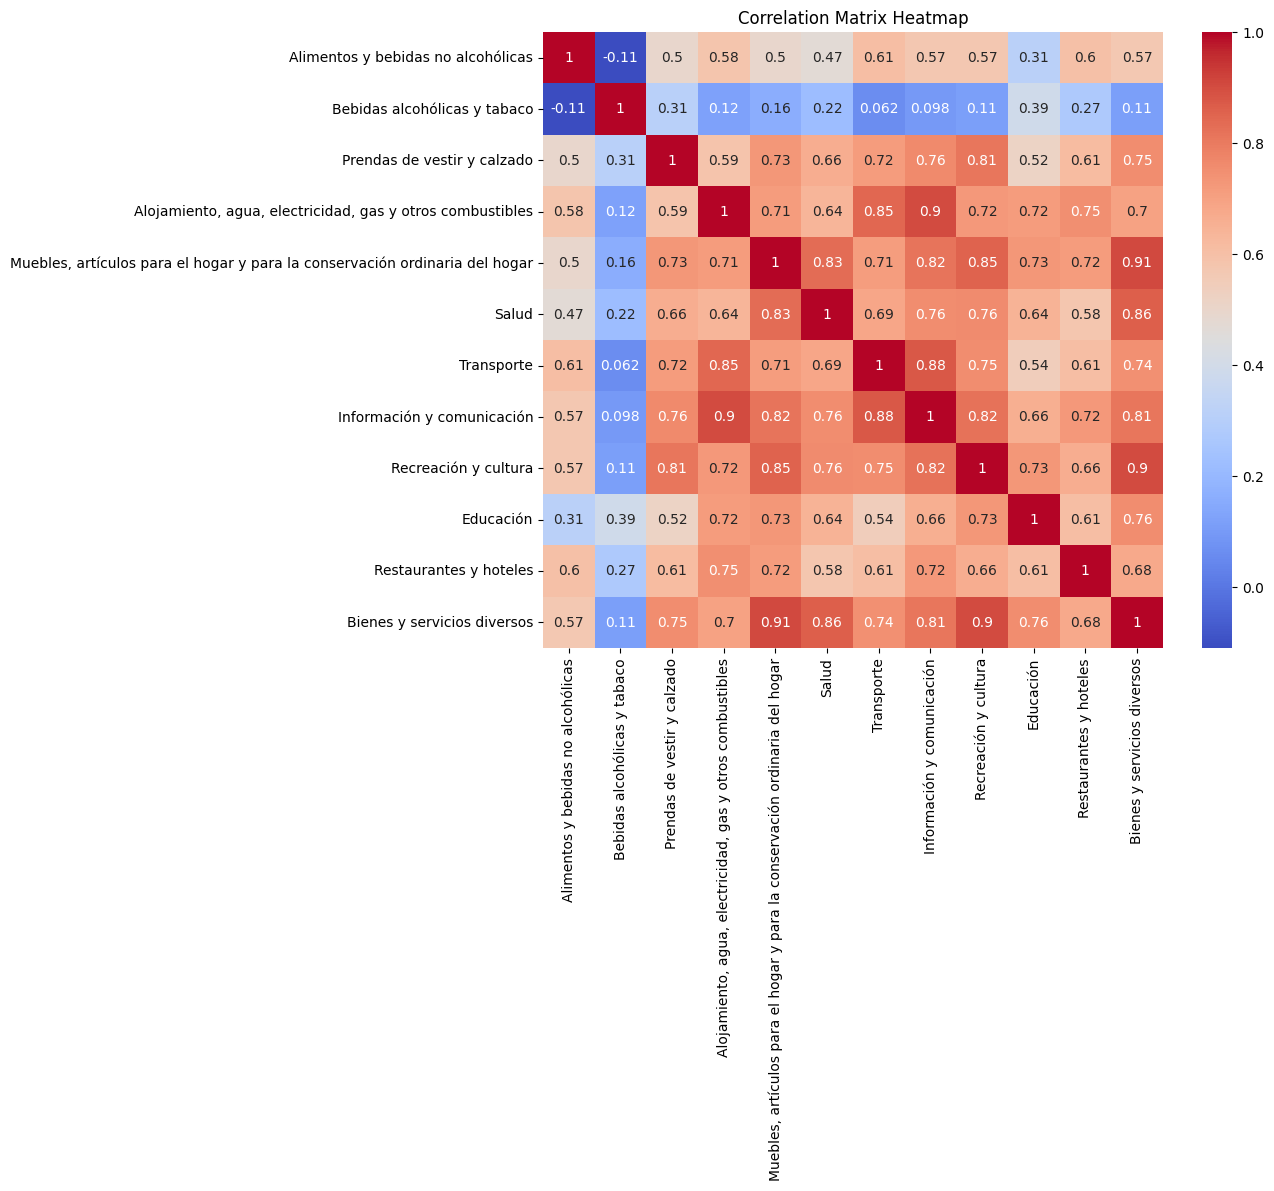

In [30]:
# Importamos matplotlib y seaborn para visualizar datos
import seaborn as sns
import matplotlib.pyplot as plt



# Creamos un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Recordemos que correlación es una medida estadística que describe la magnitud y la dirección de la **relación lineal** entre dos variables. Los valores de correlación varían entre -1 y 1. Un valor de correlación de 1 indica una fuerte correlación positiva, donde las dos variables tienden a aumentar juntas. Un valor de -1 indica una fuerte correlación negativa, donde una variable tiende a aumentar cuando la otra disminuye. Un valor de 0 indica que no hay correlación. En el mapa de calor, los colores más cálidos (más cercanos al rojo) indican una correlación positiva más fuerte, mientras que los colores más fríos (más cercanos al azul) indican una correlación negativa más fuerte. Los valores en cada celda representan el coeficiente de correlación entre las dos variables correspondientes.

Podemos ver en la gráfica por ejemplo que el gasto en  `Alimentos y bebidas no alcohólicas` está negativamente correlacionado con `Bebidas alcohólicas y tabaco` y que el gasto en `Muebles, artículos para el hogar y para la conservación ordinaria del hogar` está altamente correlacionado con el gasto en `Bienes y servicios diversos`.

Otra forma de estudiar la relación entre variables es examinar los gráficos de dispersión bivariados q entre pares de variables. Sin embargo, hay que tener en cuenta que para un conjunto de datos con `k` variables, el número de gráficos de dispersión bivariados necesarios es `k(k-1)/2``. Esto se debe a que para cada par de variables distintas, hay una gráfica de dispersión. Sin embargo, la gráfica de dispersión de la variable A contra la variable B es la misma que la de la variable B contra la variable A, por lo que dividimos por 2 para evitar gráficas duplicadas.

Para nuestro conjunto de datos, necesitaríamos 78 gráficos de dispersión bivariados para visualizar todas las relaciones entre pares de variables. Sin embargo, crear y examinar esta cantidad de gráficos puede ser poco práctico y potencialmente confuso.

En su lugar, podemos seleccionar un subconjunto de variables que sean de particular interés y centrarnos en esas. Como lo haremos a continuación o  utilizar técnicas de reducción de dimensionalidad, como es el análisis de componentes principales (PCA), que estudiaremos en *cuadernos* posteriores.

Examinemos entonces las gráficas de dispersión de las variables anteriormente resaltadas:


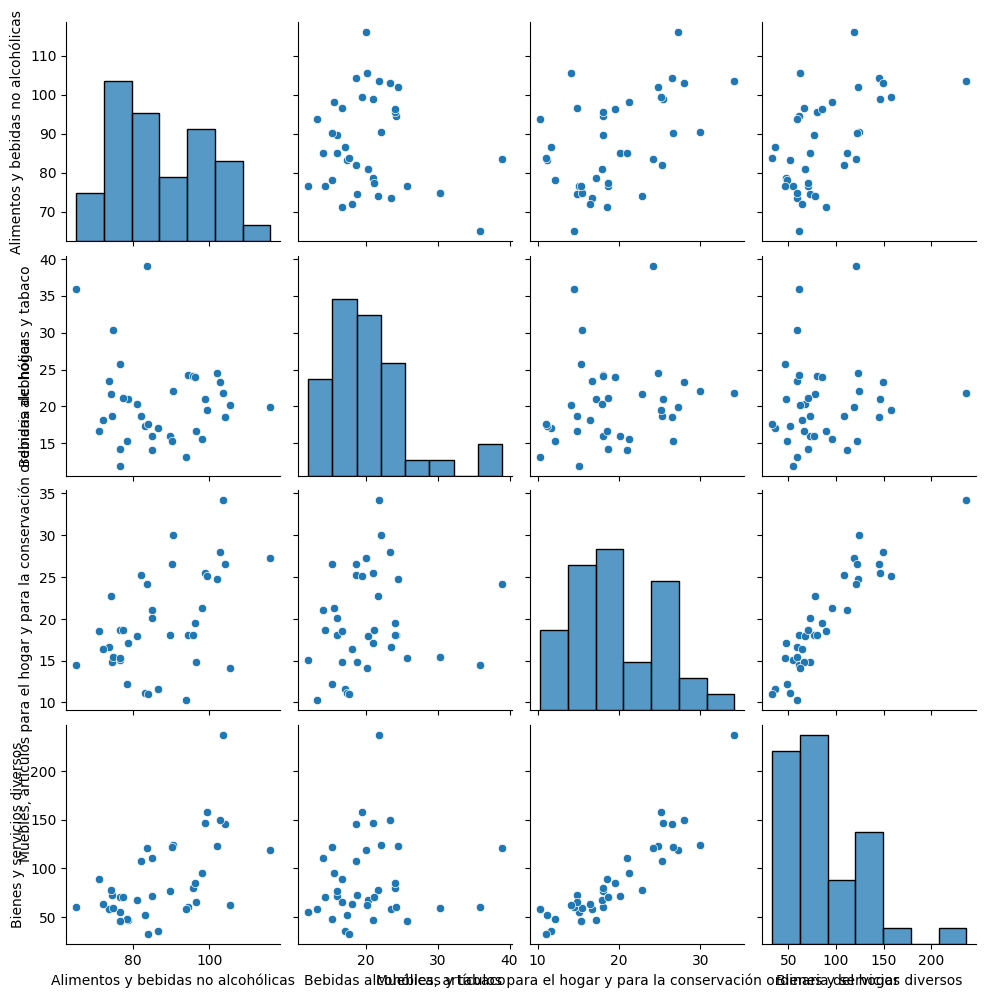

In [31]:
# Select variables of interest
variables = ['Alimentos y bebidas no alcohólicas', 'Bebidas alcohólicas y tabaco', 'Muebles, artículos para el hogar y para la conservación ordinaria del hogar', 'Bienes y servicios diversos']

# Create scatter plots
sns.pairplot(df[variables])
plt.show()

Los gráficos en la diagonal principal son histogramas que muestran la distribución de cada variable. Por ejemplo, el histograma en la segunda fila-segunda columna muestra la distribución de los gastos en `Bebidas alcohólicas y tabaco`. Podemos ver que la mayoría de las ciudades tienen gastos relativamente bajos en esta categoría, con unos pocos puntos atípicos (outliers) que gastan mucho más.

Estos gráficos proporcionan una visión útil de las relaciones entre las variables y de la distribución de cada variable. Sin embargo, es importante recordar que la correlación no implica causalidad. Aunque dos variables estén fuertemente correlacionadas, eso no significa necesariamente que una cause la otra.

## Palabras Finales


En este *cuaderno*, exploramos y repasamos las funcionalidades clave de [pandas](https://pandas.pydata.org/), una biblioteca poderosa para el análisis de datos en `Python`, que nos servirán para el desarrollo de las acrividades del curso.

También ilustramos como es posible utilizar esta librería para hacer un análisis descriptivo de los datos, calculando estadísticas descriptivas, examinando la correlación entre variables y creando gráficos de dispersión bivariados. Es importante enfatizar, que la naturaleza del análisis que se desea realizar determinará la mejor manera de describir nuestros datos.

Al ser un resumen, no es exhaustivo, por lo que te invito a revisar lo aprendido en otras asignaturas y leer las documentaciones de `Python` y [pandas](https://pandas.pydata.org/).

# Información de Sesión

In [32]:
import session_info

session_info.show(html=False)

-----
matplotlib          3.5.3
pandas              1.3.5
seaborn             0.12.2
session_info        1.0.0
-----
IPython             7.34.0
jupyter_client      7.4.9
jupyter_core        4.12.0
jupyterlab          2.1.1
notebook            6.0.3
-----
Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) [GCC 7.3.0]
Linux-6.5.0-1020-aws-x86_64-with-debian-buster-sid
-----
Session information updated at 2024-07-07 18:16
